In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
keras.__version__, tf.__version__

('2.6.0', '2.6.4')

### Here is the block of code below you need to change if you want to start it on your pc and you are not on kaggle

In [49]:
# source dataset link: https://www.kaggle.com/datasets/landrykezebou/vcor-vehicle-color-recognition-dataset/code
# just change the links to your
TRAIN_DIR = '../input/vcor-vehicle-color-recognition-dataset/train/'
VAL_DIR = '../input/vcor-vehicle-color-recognition-dataset/val/'
TEST_DIR = '../input/vcor-vehicle-color-recognition-dataset/test/'

# Data loading

In [32]:
# Basic settings to load data
IMG_SIZE=244
BATCH_SIZE = 64 
size_train_samples = 7267
size_val_samples = 1550
size_test_samples = 1556

In [33]:
# Train, validation and test data loading
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = traingen.flow_from_directory(
    TRAIN_DIR, 
    class_mode='categorical', 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE
    )

val_generator = valgen.flow_from_directory(
    VAL_DIR, 
    class_mode='categorical', 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
    )

test_generator = testgen.flow_from_directory(
    TEST_DIR, 
    class_mode='categorical',
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE
    )

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


# Data overview

In [52]:
import os
import pandas as pd
def count_images(dataset):
    """
    dataset: 'train/' or 'test/'
    """
    v = []
    for i in sorted(os.listdir(dataset)):
        v.append(len(os.listdir(dataset+i)))
    df = pd.DataFrame({'color': sorted(os.listdir(dataset)), 'count': v})
    return(df)

In [57]:
df = count_images(TRAIN_DIR)
df

,color,count
0,beige,421
1,black,406
2,blue,742
3,brown,565
4,gold,210
5,green,563
6,grey,428
7,orange,534
8,pink,483
9,purple,536


In [58]:
print('Min of dataset:', df['count'].min())
print('Mean of dataset:' , df['count'].mean())
print('Max of dataset:', df['count'].max())

Min of dataset: 210
Mean of dataset: 484.46666666666664
Max of dataset: 742


In [59]:
def show_samples(amount):
    fig = plt.figure(figsize=(20, 10))
    image_and_value_array = test_generator.next()
    image_array = image_and_value_array[0]
    for i in range(amount):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(image_array[i]))    
        plt.tight_layout()
    fig.savefig('samples.png')

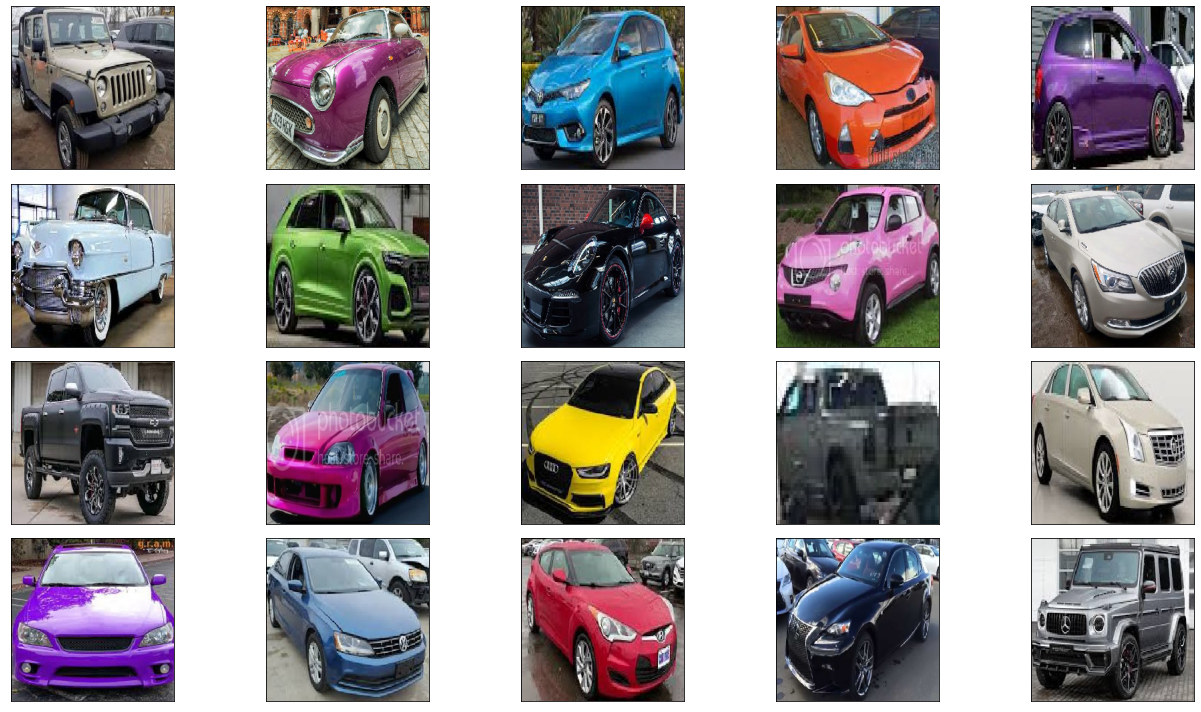

In [60]:
show_samples(20)

# Model creation

In [34]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

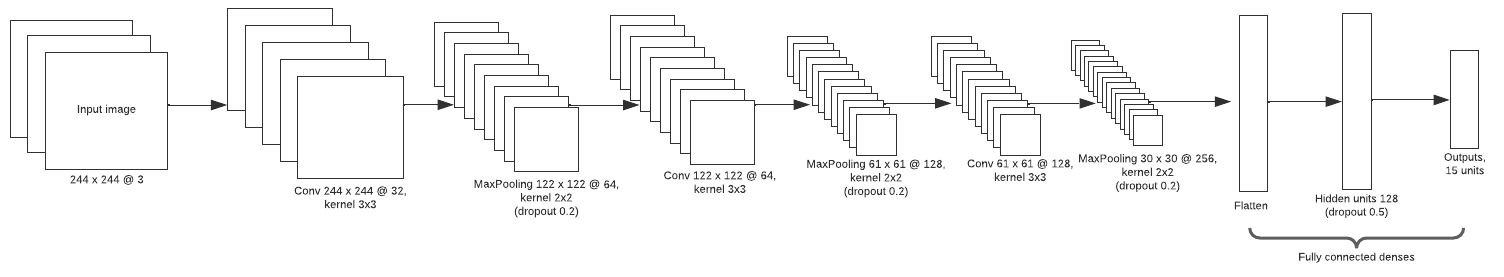

In [35]:
model = define_model()

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 244, 244, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 122, 122, 32)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 128)      

# Learning process

In [37]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=size_train_samples // BATCH_SIZE,
    epochs=15,
    validation_data=val_generator,
    validation_steps=size_val_samples // BATCH_SIZE,
    verbose=1
)

Epoch 1/15
113/113 [==============================] - 480s 4s/step - loss: 2.1133 - accuracy: 0.3450 - val_loss: 1.3380 - val_accuracy: 0.5560
Epoch 2/15
113/113 [==============================] - 464s 4s/step - loss: 1.3388 - accuracy: 0.5528 - val_loss: 1.1378 - val_accuracy: 0.6530
Epoch 3/15
113/113 [==============================] - 459s 4s/step - loss: 1.1341 - accuracy: 0.6149 - val_loss: 1.0889 - val_accuracy: 0.6296
Epoch 4/15
113/113 [==============================] - 462s 4s/step - loss: 0.9724 - accuracy: 0.6636 - val_loss: 0.8640 - val_accuracy: 0.7096
Epoch 5/15
113/113 [==============================] - 466s 4s/step - loss: 0.9000 - accuracy: 0.6897 - val_loss: 0.6860 - val_accuracy: 0.7689
Epoch 6/15
113/113 [==============================] - 476s 4s/step - loss: 0.7948 - accuracy: 0.7239 - val_loss: 0.6433 - val_accuracy: 0.7715
Epoch 7/15
113/113 [==============================] - 469s 4s/step - loss: 0.7252 - accuracy: 0.7436 - val_loss: 0.6842 - val_accuracy: 0.7507

In [40]:
import matplotlib.pyplot as plt
import sys
# plot diagnostic learning curves
def show_training_curves(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

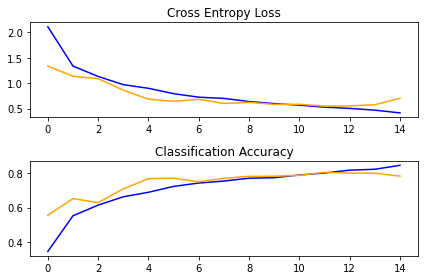

In [41]:
show_training_curves(history)

### Model saving

In [38]:
model.save('CNN.h5')

# Evaluation

In [39]:
loss, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=0)
acc

0.7885603904724121

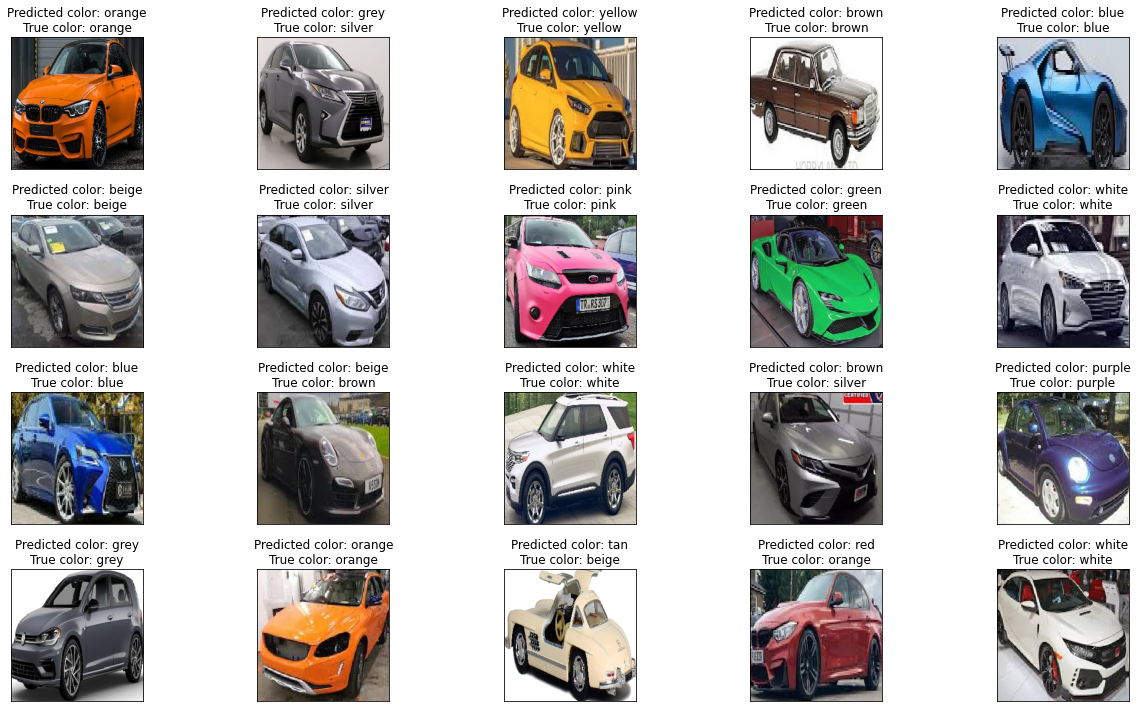

In [42]:
colors_dict = {0: "beige", 1: "black", 2: "blue", 
         3: "brown", 4: "gold", 5: "green", 
         6: "grey", 7: "orange", 8: "pink", 
         9: "purple", 10: "red", 11: "silver", 
         12: "tan", 13: "white", 14: "yellow"}

fig = plt.figure(figsize=(20, 10))
image_and_value_array = test_generator.next()
value_array = image_and_value_array[1]
image_array = image_and_value_array[0]
for i in range(20):
    # Define predicted color of network
    extended_image_array = np.array([image_array[i]])
    cnn_predict = model.predict(extended_image_array)
    predicted_class = cnn_predict.argmax()
    corresponding_color = colors_dict[predicted_class]

    # Define true color
    true_class = value_array[i].argmax()
    true_color = colors_dict[true_class]
    
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(image_array[i]))
    
    plt.tight_layout()
    
    ax.set_title(f'Predicted color: {corresponding_color}\nTrue color: {true_color}')
fig.savefig('testgallery.png')